# Data wrangling: pollution in NE

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

import openaq
from IPython.core.display import display

# pd.set_option('max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

#Load data

In [4]:
daily_aqi_by_county_2017 = pd.read_csv('../../data/raw/daily_aqi_by_county_2017.csv', encoding='latin-1')
daily_aqi_by_county_2018 = pd.read_csv('../../data/raw/daily_aqi_by_county_2018.csv')
daily_aqi_by_county_2019 = pd.read_csv('../../data/raw/daily_aqi_by_county_2019.csv')

annual_income_by_county = pd.read_csv('../../data/raw/CAINC1__ALL_AREAS_1969_2019.csv', encoding='latin-1')

county_demographic = pd.read_csv('../../data/raw/county_cc-est2019-alldata.csv', encoding='latin-1')



# Explore personal income by county

In [12]:
print(annual_income_by_county.columns)

print(annual_income_by_county.loc[:, 'Region'].unique())

print(annual_income_by_county.head())

print(county_demographic.columns)

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019'],
      dtype='object')
[' ' '5' '8' '6' '7' '1' '2' '3' '4' nan]
    GeoFIPS        GeoName Region TableName  LineCode IndustryClassification  \
0   "00000"  United States           CAINC1       1.0                    ...   
1   "00000"  United States           CAINC1       2.0                    ...   
2   "00000"  United States           CAINC1       3.0                    ...   
3   "01000"        Alabama      5    CAINC1  

In [71]:
# work with one state massachusetts 2019

print(daily_aqi_by_county_2019.columns)

print(daily_aqi_by_county_2017.loc[daily_aqi_by_county_2019['State Name'].str.startswith('Mass')])

mass = daily_aqi_by_county_2019['State Code'] == 25

print(daily_aqi_by_county_2019.loc[mass])

mass = pd.DataFrame(daily_aqi_by_county_2019[mass])
mass.drop(['State Code', 'State Name'], axis=1, inplace=True)
mass.head()

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object')
           State Name county Name  State Code  County Code        Date  AQI  \
133919       Maryland  Washington          24           43  2017-03-26   33   
133920       Maryland  Washington          24           43  2017-03-27   34   
133921       Maryland  Washington          24           43  2017-03-28   55   
133922       Maryland  Washington          24           43  2017-03-29   41   
133923       Maryland  Washington          24           43  2017-03-30   37   
...               ...         ...         ...          ...         ...  ...   
138628  Massachusetts   Worcester          25           27  2017-04-09   47   
138629  Massachusetts   Worcester          25           27  2017-04-10   87   
138630  Massachusetts   Worcester          25           27  2017-04-11   97   
138631  Massa

,county Name,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
133919,Barnstable,1,2019-01-01,33,Good,Ozone,25-001-0002,1
133920,Barnstable,1,2019-01-02,35,Good,Ozone,25-001-0002,1
133921,Barnstable,1,2019-01-03,36,Good,Ozone,25-001-0002,1
133922,Barnstable,1,2019-01-04,26,Good,Ozone,25-001-0002,1
133923,Barnstable,1,2019-01-05,37,Good,Ozone,25-001-0002,1


       County Code          AQI  Number of Sites Reporting
count  4714.000000  4714.000000                4714.000000
mean     13.645736    38.623250                   1.677980
std       8.242896    10.589007                   0.732266
min       1.000000     2.000000                   1.000000
25%       7.000000    32.000000                   1.000000
50%      13.000000    38.000000                   2.000000
75%      21.000000    44.000000                   2.000000
max      27.000000   126.000000                   3.000000


<AxesSubplot:xlabel='county Name'>

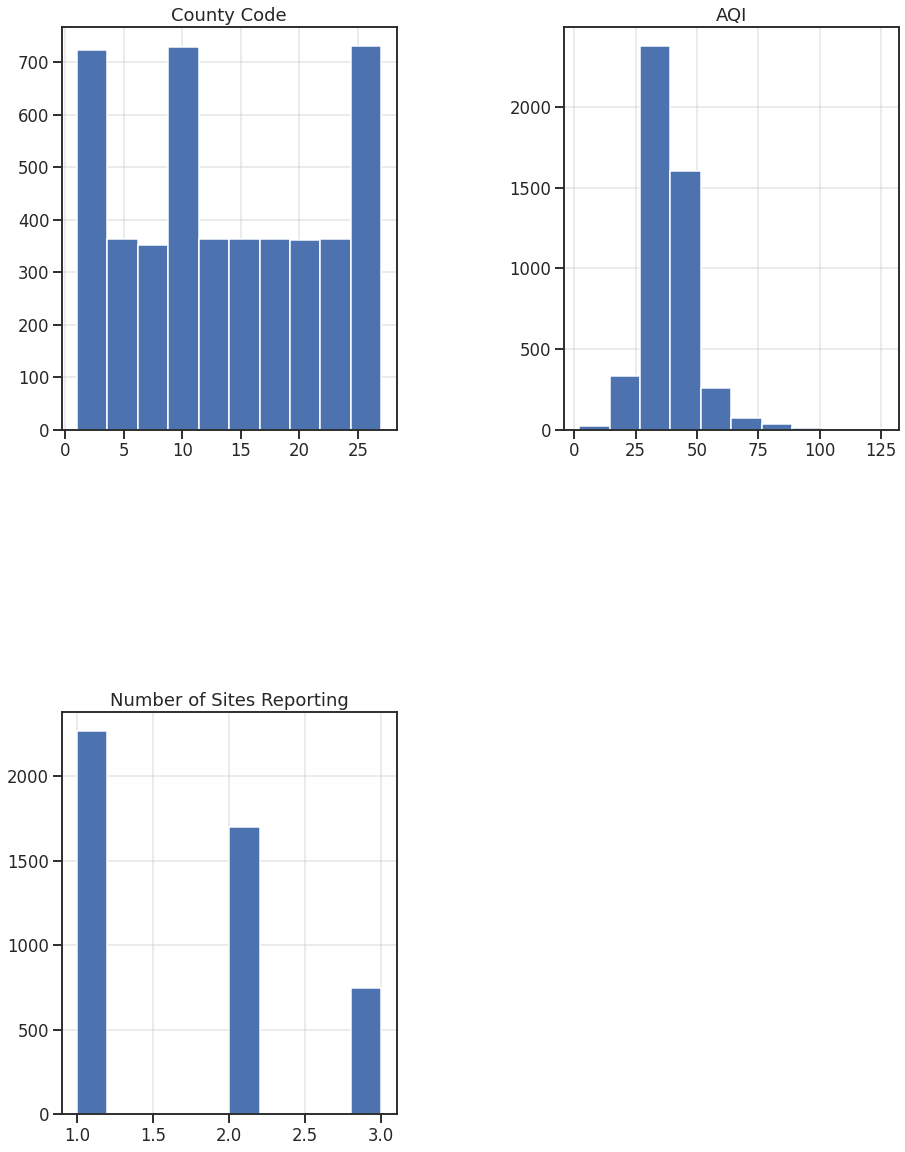

In [ ]:
# klib.dist_plot(mass)

print(mass.describe())

mass.hist(figsize=(15,20))
plt.subplots_adjust(hspace=0.7, wspace=0.5)

In [ ]:
mass.plot(kind='bar', x='county Name', y='AQI')